In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import numpy as np
import random

In [2]:
cd "D://Spring 2019//EE 257//prjt//dataset_two_gas_sources_//dataset_twosources_downsampled//"

D:\Spring 2019\EE 257\prjt\dataset_two_gas_sources_\dataset_twosources_downsampled


In [3]:
threshEthylene=593 

In [4]:
#High Ethylene Concentration with no CO concentration
dfEty0 = pd.read_csv('000_Et_H_CO_n', header = None)

dfEty0[11]=2
y_H=dfEty0[11]
del dfEty0[0]
del dfEty0[11]

In [5]:
dfM0 = pd.read_csv('025_Et_n_Me_H', header = None)
dfM0[11]=1
y_M=dfM0[11]
del dfM0[0]
del dfM0[11]

In [6]:
dfCo0 = pd.read_csv('012_Et_n_CO_H', header = None)
dfCo0[11]=0
y_L=dfCo0[11]
del dfCo0[0]
del dfCo0[11]

In [7]:
#Spliting train and test data without shuffling

split_value=1000

X_train=pd.concat([dfEty0[:split_value], dfM0[:split_value], dfCo0[:split_value]], ignore_index=True)
X_test=pd.concat([dfEty0[split_value:], dfM0[split_value:], dfCo0[split_value:]], ignore_index=True)
y_train=pd.concat([y_H[:split_value], y_M[:split_value], y_L[:split_value]], ignore_index=True)
y_test=pd.concat([y_H[split_value:], y_M[split_value:], y_L[split_value:]], ignore_index=True)


#y_train = y_train.map({'Ethylene':0, 'Methane':1, 'CO':2})
#y_test = y_test.map({'Ethylene':0, 'Methane':1, 'CO':2})

In [8]:
#normalizing X data
from sklearn import preprocessing

x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
0    3000 non-null float64
1    3000 non-null float64
2    3000 non-null float64
3    3000 non-null float64
4    3000 non-null float64
5    3000 non-null float64
6    3000 non-null float64
7    3000 non-null float64
8    3000 non-null float64
9    3000 non-null float64
dtypes: float64(10)
memory usage: 234.5 KB


In [10]:
X_test.columns = [ 'Temperature', 'RelativeHumidity', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']
X_train.columns = [ 'Temperature', 'RelativeHumidity', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 10 columns):
Temperature         5910 non-null float64
RelativeHumidity    5910 non-null float64
S1                  5910 non-null float64
S2                  5910 non-null float64
S3                  5910 non-null float64
S4                  5910 non-null float64
S5                  5910 non-null float64
S6                  5910 non-null float64
S7                  5910 non-null float64
S8                  5910 non-null float64
dtypes: float64(10)
memory usage: 461.8 KB


In [17]:
import pandas as pd
import numpy as np
import pydotplus  # Check the references if you need help to install this module.
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # References: download link and instructions to install Graphviz.
from IPython.display import Image  # To plot decision tree.
from sklearn.externals.six import StringIO  # To plot decision tree.
from sklearn.metrics import mean_squared_error, confusion_matrix,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 


from sklearn.model_selection import train_test_split
%matplotlib inline

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print (accuracy )
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
print(confusion_matrix(y_test, knn_predictions) )
print(classification_report(y_test, knn_predictions))

0.9362098138747885
[[1757    0  213]
 [   0 1970    0]
 [ 164    0 1806]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1970
           1       1.00      1.00      1.00      1970
           2       0.89      0.92      0.91      1970

   micro avg       0.94      0.94      0.94      5910
   macro avg       0.94      0.94      0.94      5910
weighted avg       0.94      0.94      0.94      5910



# Decision Tree Classifier

In [19]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)


In [20]:
dtree_model = DecisionTreeClassifier().fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test)

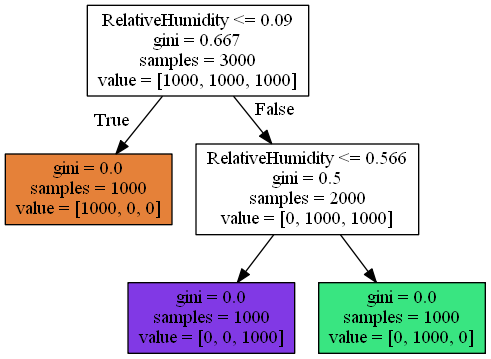

In [21]:
from io import StringIO
from sklearn import tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
graph = print_tree(dtree_model, features=list(X_train.columns.values))
Image(graph.create_png())

In [22]:
print('Test MSE: ', mean_squared_error(y_test, dtree_model.predict(X_test)))

Test MSE:  0.0


In [23]:
print ('Accuracy :',dtree_model.score(X_test, y_test) )
print('Confusion Matrix:',confusion_matrix(y_test, dtree_predictions))
print('Classification Report:',classification_report(y_test,dtree_predictions))

Accuracy : 1.0
Confusion Matrix: [[1970    0    0]
 [   0 1970    0]
 [   0    0 1970]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1970
           1       1.00      1.00      1.00      1970
           2       1.00      1.00      1.00      1970

   micro avg       1.00      1.00      1.00      5910
   macro avg       1.00      1.00      1.00      5910
weighted avg       1.00      1.00      1.00      5910



In [24]:
# Variable importance
importance = pd.DataFrame({'Importance':dtree_model.feature_importances_*100}, index=X_train.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable importance')
plt.legend(loc='lower right')

# SVM

In [25]:
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
 

In [26]:
#linear kernel
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test) 
print ('Accuracy :',svclassifier.score(X_test, y_test) )
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

Accuracy : 0.581725888324873
[[1442    0  528]
 [   0 1970    0]
 [1944    0   26]]
              precision    recall  f1-score   support

           0       0.43      0.73      0.54      1970
           1       1.00      1.00      1.00      1970
           2       0.05      0.01      0.02      1970

   micro avg       0.58      0.58      0.58      5910
   macro avg       0.49      0.58      0.52      5910
weighted avg       0.49      0.58      0.52      5910



In [27]:
#polynomial kernel
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)  

print ('Accuracy :',svclassifier.score(X_test, y_test) )
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

C:\Users\MAVERICK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy : 0.5358714043993231
[[   0 1970    0]
 [   0 1970    0]
 [   0  773 1197]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1970
           1       0.42      1.00      0.59      1970
           2       1.00      0.61      0.76      1970

   micro avg       0.54      0.54      0.54      5910
   macro avg       0.47      0.54      0.45      5910
weighted avg       0.47      0.54      0.45      5910



C:\Users\MAVERICK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
#guassian kernel
svclassifier = SVC(kernel='rbf')   
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)  

print ('Accuracy :',svclassifier.score(X_test, y_test) )
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

C:\Users\MAVERICK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy : 0.8791878172588833
[[1662    0  308]
 [   0 1970    0]
 [ 406    0 1564]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1970
           1       1.00      1.00      1.00      1970
           2       0.84      0.79      0.81      1970

   micro avg       0.88      0.88      0.88      5910
   macro avg       0.88      0.88      0.88      5910
weighted avg       0.88      0.88      0.88      5910



In [29]:
#sigmoid kernel
svclassifier = SVC(kernel='sigmoid')   
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)

print ('Accuracy :',svclassifier.score(X_test, y_test) )
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

C:\Users\MAVERICK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy : 0.4847715736040609
[[ 895    0 1075]
 [   0 1970    0]
 [1970    0    0]]
              precision    recall  f1-score   support

           0       0.31      0.45      0.37      1970
           1       1.00      1.00      1.00      1970
           2       0.00      0.00      0.00      1970

   micro avg       0.48      0.48      0.48      5910
   macro avg       0.44      0.48      0.46      5910
weighted avg       0.44      0.48      0.46      5910

